### K-maean clustering

In [32]:
#this is required to prevent  warning from k-mean in scikit-learn
import os 
os.environ["OMP_NUM_THREADS"] = "1"

In [33]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

In [34]:
df = pd.read_csv("SampleClusterData1.csv")
df

,X,Y
0,160,100
1,212,86
2,198,128
3,168,76
4,194,48
...,...,...
515,383,169
516,388,188
517,389,216
518,403,199


## Exploratory data analysis

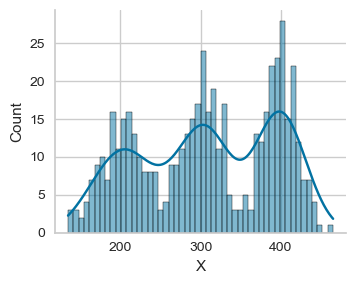

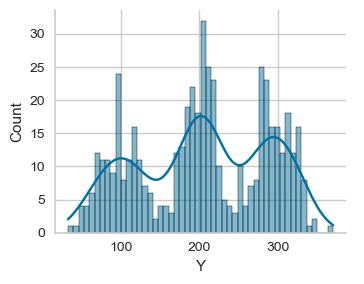

In [35]:
#histogram plot
for x in  df.columns:
    sns.FacetGrid(df, aspect=1.2).map(sns.histplot,x, bins=50, kde=True).add_legend()

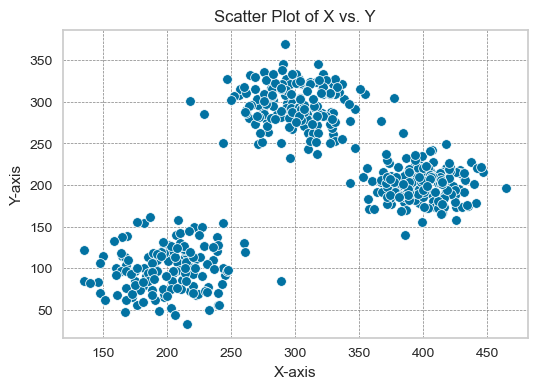

In [36]:
plt.figure(figsize=(6, 4))  #
sns.scatterplot(data=df, x="X", y="Y")

# Add labels and title 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()

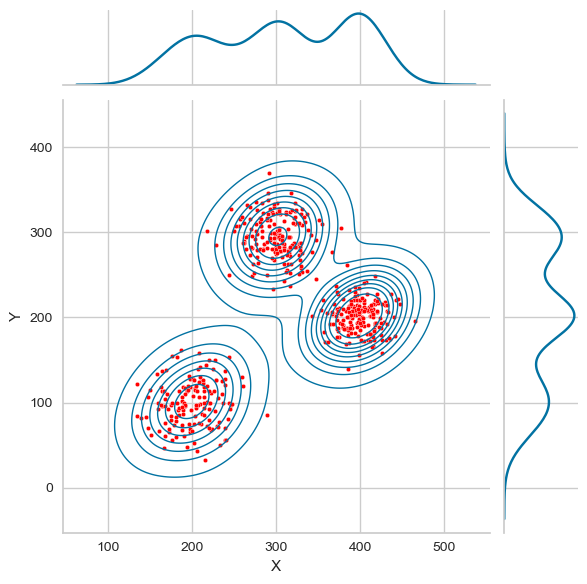

In [37]:
ax = sns.jointplot(data=df, x="X", y="Y", kind="kde", levels=10, linewidths=1)
_ = sns.scatterplot(data=df, x="X", y="Y", ax=ax.ax_joint, color='red', s=10)

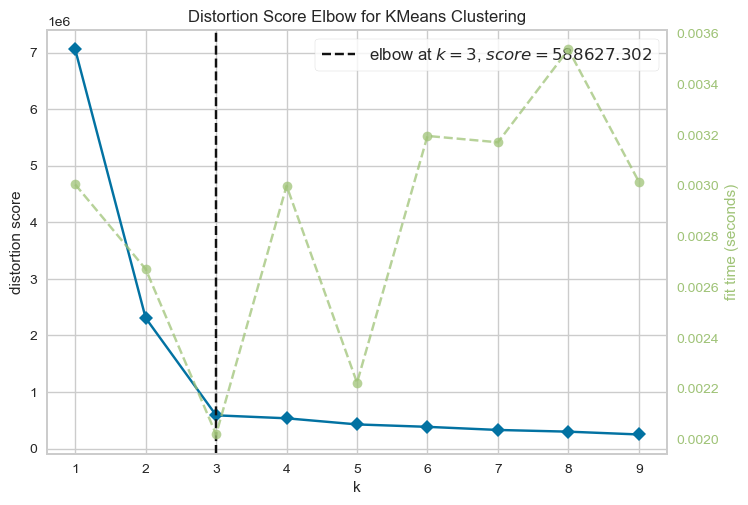

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df)  # Fit the data to the visualizer
visualizer.poof()  # Finalize and show the figure


#### The elbow method indicates that there should be 3 clusters, confirming what we saw with the scatter plot.

## Modeling


In [47]:
k = 3 	#number of clusters
kmeans = KMeans(n_clusters= k)
clusters = kmeans.fit_predict(df)


df_clusters = df.copy()
df_clusters.insert(0,"Cluster", clusters)
df_clusters

,Cluster,X,Y
0,1,160,100
1,1,212,86
2,1,198,128
3,1,168,76
4,1,194,48
...,...,...,...
515,0,383,169
516,0,388,188
517,0,389,216
518,0,403,199


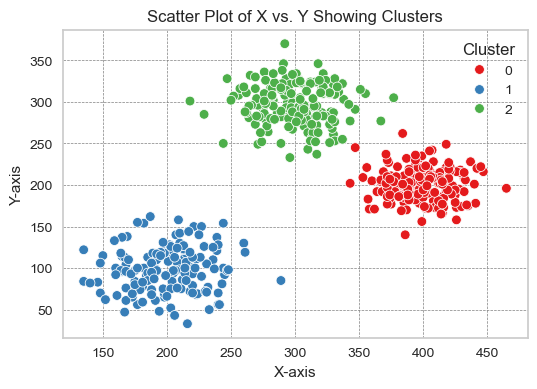

In [48]:
palette = sns.color_palette(palette='Set1')[0:k]
plt.figure(figsize=(6, 4))  

sns.scatterplot(data=df_clusters, x="X", y="Y", hue="Cluster", palette=palette)
sns.color_palette(palette='Set1')
# Add labels and title 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y Showing Clusters")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()